# First Pick - Phase 2 - Pick 2

# Notebook Imports

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

import statistics
from statistics import mode
from scipy.stats import loguniform

import joblib

import time

# Multiclass Classification

## Random Forest Classifier

### Data Prep

In [55]:
df_reshaped = pd.read_pickle('./saved_files/data_final.pickle')

# N1
# # defining features and targets

# # select features
# fp_2p_features = df_reshaped[['left_attack_damage_1',
#                               'left_receive_damage_1',
#                               'right_attack_damage_1', 'right_attack_damage_2',
#                               'right_receive_damage_1', 'right_receive_damage_2',
#                               'left_hero_code_1', 
#                               'right_hero_code_1', 'right_hero_code_2',
#                               'left_preban_1', 'left_preban_2', 
#                               'right_preban_1', 'right_preban_2', 'first_pick', 'is_win']]

# fp_2p_target = df_reshaped['left_hero_code_2']

# X_train_fp_2p, X_test_fp_2p, y_train_fp_2p, y_test_fp_2p = train_test_split(fp_2p_features, fp_2p_target, test_size= 0.2, shuffle = True, random_state= 890)

# # Scaling 
# # Define numeric features
# fp_2p_numeric = ['left_attack_damage_1',
#                  'left_receive_damage_1',
#                  'right_attack_damage_1', 'right_attack_damage_2', 
#                  'right_receive_damage_1', 'right_receive_damage_2']







# N2
# defining features and targets

# select features
fp_2p_features = df_reshaped[['left_pick_order_1', 'left_pick_order_2',
                              'left_kill_count_1', 'left_kill_count_2',
                              'left_attribute_cd_1', 
                              'left_job_cd_1',
                              
                              'right_pick_order_1', 'right_pick_order_2',
                              'right_kill_count_1', 'right_kill_count_2',
                              'right_attribute_cd_1', 'right_attribute_cd_2',
                              'right_job_cd_1', 'right_job_cd_2',
    
                              'left_attack_damage_1', 'left_attack_damage_2',
                              'left_receive_damage_1', 'left_receive_damage_2',
                              'right_attack_damage_1', 'right_attack_damage_2',
                              'right_receive_damage_1', 'right_receive_damage_2',
                              'left_hero_code_1', 
                              'right_hero_code_1', 'right_hero_code_2',
                              'left_preban_1', 'left_preban_2', 
                              'right_preban_1', 'right_preban_2', 'first_pick', 'is_win']]

fp_2p_target = df_reshaped['left_hero_code_2']

X_train_fp_2p, X_test_fp_2p, y_train_fp_2p, y_test_fp_2p = train_test_split(fp_2p_features, fp_2p_target, test_size= 0.2, shuffle = True, random_state= 890)

# Scaling 
# Define numeric features
fp_2p_numeric = ['left_kill_count_1', 'left_kill_count_2',
                 'right_kill_count_1', 'right_kill_count_2',
                 
                 'left_attack_damage_1', 'left_attack_damage_2',
                 'left_receive_damage_1', 'left_receive_damage_2',
                 'right_attack_damage_1', 'right_attack_damage_2', 
                 'right_receive_damage_1', 'right_receive_damage_2']



In [56]:
# Scale numeric features
fp_2p_scaler = StandardScaler()
fp_2p_scaler.fit(X_train_fp_2p[fp_2p_numeric])

StandardScaler()

In [57]:
X_train_fp_2p_trans = pd.DataFrame()
X_test_fp_2p_trans = pd.DataFrame()

X_train_fp_2p_trans[fp_2p_numeric] = fp_2p_scaler.transform(X_train_fp_2p[fp_2p_numeric])
X_test_fp_2p_trans[fp_2p_numeric] = fp_2p_scaler.transform(X_test_fp_2p[fp_2p_numeric])

In [58]:
# Encoding the categorical features
# Initializing an ordinal encoder for categorical variables
fp_2p_enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
# categorical labels
fp_2p_categorical = ['left_attribute_cd_1', 
                     'left_job_cd_1', 
                     
                     'right_attribute_cd_1', 'right_attribute_cd_2' ,
                     'right_job_cd_1', 'right_job_cd_2',
                     
                     'left_hero_code_1',                    
                     'right_hero_code_1', 'right_hero_code_2',
                     'left_preban_1', 'left_preban_2', 
                     'right_preban_1', 'right_preban_2']

X_train_fp_2p_trans[fp_2p_categorical] = fp_2p_enc.fit_transform(X_train_fp_2p[fp_2p_categorical].to_numpy())
X_test_fp_2p_trans[fp_2p_categorical] = fp_2p_enc.transform(X_test_fp_2p[fp_2p_categorical].to_numpy())

In [59]:
X_train_fp_2p_trans.index
X_test_fp_2p_trans.index

RangeIndex(start=0, stop=1979, step=1)

In [60]:
X_train_fp_2p = X_train_fp_2p.reset_index(drop=True)
X_test_fp_2p = X_test_fp_2p.reset_index(drop=True)

In [61]:
X_test_fp_2p.isna().sum()
X_test_fp_2p_trans.isna().sum()

left_kill_count_1         0
left_kill_count_2         0
right_kill_count_1        0
right_kill_count_2        0
left_attack_damage_1      0
left_attack_damage_2      0
left_receive_damage_1     0
left_receive_damage_2     0
right_attack_damage_1     0
right_attack_damage_2     0
right_receive_damage_1    0
right_receive_damage_2    0
left_attribute_cd_1       0
left_job_cd_1             0
right_attribute_cd_1      0
right_attribute_cd_2      0
right_job_cd_1            0
right_job_cd_2            0
left_hero_code_1          0
right_hero_code_1         0
right_hero_code_2         0
left_preban_1             0
left_preban_2             0
right_preban_1            0
right_preban_2            0
dtype: int64

In [62]:
# add features left out of scaling
l0f_fp_2p = ['left_pick_order_1', 'left_pick_order_2',
             'right_pick_order_1', 'right_pick_order_2',
             
             'first_pick', 'is_win']

X_train_fp_2p_trans[l0f_fp_2p] = X_train_fp_2p[l0f_fp_2p]
X_test_fp_2p_trans[l0f_fp_2p] = X_test_fp_2p[l0f_fp_2p]

In [63]:
X_test_fp_2p_trans[l0f_fp_2p]

,left_pick_order_1,left_pick_order_2,right_pick_order_1,right_pick_order_2,first_pick,is_win
0,1,2,1,2,0,2
1,1,2,1,2,0,2
2,1,2,1,2,1,2
3,1,2,1,2,0,1
4,1,2,1,2,0,2
...,...,...,...,...,...,...
1974,1,2,1,2,0,2
1975,1,2,1,2,0,1
1976,1,2,1,2,0,2
1977,1,2,1,2,1,1


In [64]:
X_test_fp_2p_trans.isna().sum()

left_kill_count_1         0
left_kill_count_2         0
right_kill_count_1        0
right_kill_count_2        0
left_attack_damage_1      0
left_attack_damage_2      0
left_receive_damage_1     0
left_receive_damage_2     0
right_attack_damage_1     0
right_attack_damage_2     0
right_receive_damage_1    0
right_receive_damage_2    0
left_attribute_cd_1       0
left_job_cd_1             0
right_attribute_cd_1      0
right_attribute_cd_2      0
right_job_cd_1            0
right_job_cd_2            0
left_hero_code_1          0
right_hero_code_1         0
right_hero_code_2         0
left_preban_1             0
left_preban_2             0
right_preban_1            0
right_preban_2            0
left_pick_order_1         0
left_pick_order_2         0
right_pick_order_1        0
right_pick_order_2        0
first_pick                0
is_win                    0
dtype: int64

In [65]:
# Create a copy of training data after encoding
new_X_train_fp_2p = X_train_fp_2p.copy()

In [66]:
X_train_fp_2p.columns

Index(['left_pick_order_1', 'left_pick_order_2', 'left_kill_count_1',
       'left_kill_count_2', 'left_attribute_cd_1', 'left_job_cd_1',
       'right_pick_order_1', 'right_pick_order_2', 'right_kill_count_1',
       'right_kill_count_2', 'right_attribute_cd_1', 'right_attribute_cd_2',
       'right_job_cd_1', 'right_job_cd_2', 'left_attack_damage_1',
       'left_attack_damage_2', 'left_receive_damage_1',
       'left_receive_damage_2', 'right_attack_damage_1',
       'right_attack_damage_2', 'right_receive_damage_1',
       'right_receive_damage_2', 'left_hero_code_1', 'right_hero_code_1',
       'right_hero_code_2', 'left_preban_1', 'left_preban_2', 'right_preban_1',
       'right_preban_2', 'first_pick', 'is_win'],
      dtype='object')

In [67]:
# Change columns names in the copied data to concatinate with the original data
new_X_train_fp_2p.columns = ['left_pick_order_1_orig', 'left_pick_order_2_orig',
                             'left_kill_count_1_orig', 'left_kill_count_2_orig', 
                             'left_attribute_cd_1_orig', 
                             'left_job_cd_1_orig', 
                             
                             'right_pick_order_1_orig', 'right_pick_order_2_orig',
                             'right_kill_count_1_orig', 'right_kill_count_2_orig',
                             'right_attribute_cd_1_orig', 'right_attribute_cd_2_orig',
                             'right_job_cd_1_orig', 'right_job_cd_2_orig',
       
                             'left_attack_damage_1_orig', 'left_attack_damage_2_orig',
                             'left_receive_damage_1_orig', 'left_receive_damage_2_orig',
                             'right_attack_damage_1_orig', 'right_attack_damage_2_orig', 
                             'right_receive_damage_1_orig', 'right_receive_damage_2_orig',
                             'left_hero_code_1_orig',
                             'right_hero_code_1_orig', 'right_hero_code_2_orig', 
                             'left_preban_1_orig', 'left_preban_2_orig', 
                             'right_preban_1_orig', 'right_preban_2_orig', 
                             'first_pick_orig', 'is_win_orig']

In [68]:
len(new_X_train_fp_2p.columns)

31

In [69]:
# Cocatenate original data with encoded data for encoding names later in the function
dict_fp_2p = pd.concat((X_train_fp_2p_trans,new_X_train_fp_2p.reset_index(drop=True)), axis= 1).copy()
len(dict_fp_2p.columns)

62

In [70]:
dict_fp_2p[['left_hero_code_1', 'left_hero_code_1_orig']]

,left_hero_code_1,left_hero_code_1_orig
0,33.0,Sea Phantom Politis
1,25.0,New Moon Luna
2,19.0,Laia
3,13.0,Death Dealer Ray
4,19.0,Laia
...,...,...
7908,18.0,Jenua
7909,39.0,Zio
7910,15.0,Dragon Bride Senya
7911,13.0,Death Dealer Ray


In [71]:
y_train_fp_2p.value_counts()

left_hero_code_2
Ambitious Tywin     1239
Jenua                830
Death Dealer Ray     775
Politis              528
Blood Moon Haste     491
                    ... 
Fumyr                  1
Senya                  1
Emilia                 1
Blooming Lidica        1
Roana                  1
Name: count, Length: 79, dtype: int64

### Saving a file of Hero Codes & Names

In [99]:
# Save the concatinated df
# dict_fp_2p.to_pickle('./saved_files/dict_fp_2p_single-target.pickle')

### Tunning Hyperparameters

In [72]:
# RandomizedSearchCV parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 2, 3, None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 6, 10, 12, 14, 18, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 77, 105, 133, 161, 188, 216, 244, 272, 300], 'max_features': ['sqrt', 'log2', 2, 3, None], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 6, 10, 12, 14, 18, 20], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [102]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=890)
# Fit the random search model
rf_random.fit(X_train_fp_2p_trans, y_train_fp_2p)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/ostap/projects/mike_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, max_depth=22, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=216; total time=   1.6s
[CV] END bootstrap=True, max_depth=22, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=216; total time=   1.6s
[CV] END bootstrap=True, max_depth=22, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=216; total time=   1.7s
[CV] END bootstrap=True, max_depth=22, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=216; total time=   1.6s
[CV] END bootstrap=True, max_depth=22, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=216; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=161; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=20, n_estimators=161; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=2, m

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 22, 26, 30,
                                                      34, 38, 42, 46, 50,
                                                      None],
                                        'max_features': ['sqrt', 'log2', 2, 3,
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 6, 10, 12, 14,
                                                              18, 20],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=890, verbose=2)

In [59]:
# View the best parameters from fitting the random search N1
rf_random.best_params_


{'n_estimators': 244,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 42,
 'bootstrap': True}

In [103]:
# View the best parameters from fitting the random search N2
# Added features: pick order, attributes, jobs, kill counts, damage recieved and dealt for the targeted pick 
rf_random.best_params_

{'n_estimators': 188,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 46,
 'bootstrap': False}

### Training and Evaluating

In [36]:
# Evaluaing the model N1
classifier_fp_2p_p2 = RandomForestClassifier(random_state=890, max_depth = 42, n_estimators=244, min_samples_split = 14, min_samples_leaf = 2, max_features = None, bootstrap = True)
classifier_fp_2p_p2.fit(X_train_fp_2p_trans, y_train_fp_2p)
predictions_fp_2p_p2 = classifier_fp_2p_p2.predict(X_test_fp_2p_trans)
classifier_fp_2p_p2.score(X_test_fp_2p_trans, y_test_fp_2p)

RandomForestClassifier(max_depth=42, max_features=None, min_samples_leaf=2,
                       min_samples_split=14, n_estimators=244,
                       random_state=890)

In [25]:
# Write a function for model evaluation
def rec_prec_f1(target, prediction):
    print("Recall" , recall_score(target, prediction, average= 'micro'))
    print("Accuracy", precision_score(target, prediction, average= 'micro'))
    print("F1-score", f1_score(target, prediction, average= 'micro'))

In [38]:
# Evaluate the model with features selection N1
rec_prec_f1(y_test_fp_2p, predictions_fp_2p_p2)

Recall 0.34916624557857506
Accuracy 0.34916624557857506
F1-score 0.34916624557857506


In [73]:
# Evaluaing the model with features selection N2
classifier_fp_2p_p2 = RandomForestClassifier(random_state=890, max_depth = 46, n_estimators=188, min_samples_split = 6, min_samples_leaf = 1, max_features = 'sqrt', bootstrap = False)
classifier_fp_2p_p2.fit(X_train_fp_2p_trans, y_train_fp_2p)
predictions_fp_2p_p2 = classifier_fp_2p_p2.predict(X_test_fp_2p_trans)
classifier_fp_2p_p2.score(X_test_fp_2p_trans, y_test_fp_2p)

0.43102577059120767

In [74]:
# Evaluate the model with features selection N2
rec_prec_f1(y_test_fp_2p, predictions_fp_2p_p2)

Recall 0.43102577059120767
Accuracy 0.43102577059120767
F1-score 0.43102577059120767


Including additional features resulted in a higher score: 34.9 vs 43.1

In [75]:
# Class probabilities of test features
y_score = classifier_fp_2p_p2.predict_proba(X_test_fp_2p_trans)
y_score

array([[0.        , 0.25629433, 0.        , ..., 0.00132979, 0.        ,
        0.        ],
       [0.        , 0.02207447, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04308511, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00177305, 0.01187943, 0.        , ..., 0.        , 0.        ,
        0.00132979],
       [0.        , 0.05939716, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00815603, 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### One-vs-Rest multiclass ROC

In [76]:
# Binarize the target by one-hot-encoding in a OvR fashion

label_binarizer = LabelBinarizer().fit(y_train_fp_2p)
y_onehot_test = label_binarizer.transform(y_test_fp_2p)
y_onehot_test.shape  # (n_samples, n_classes)

(1979, 79)

In [77]:
class_of_interest = "Abyssal Yufine"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

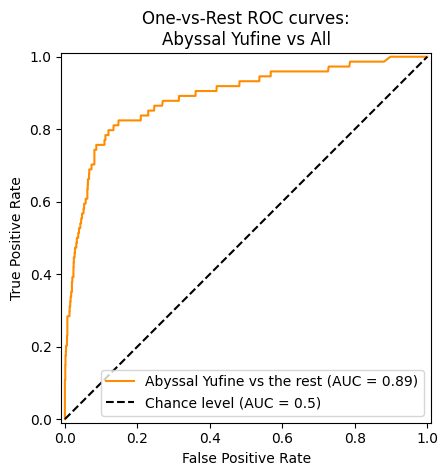

In [78]:

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nAbyssal Yufine vs All",
)


In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging. In such cases, one can alternatively use a weighted macro-averaging

#### ROC curve using micro-averaged OvR

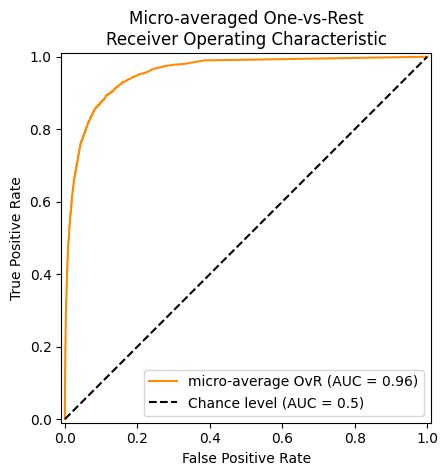

In [79]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [80]:
micro_roc_auc_ovr = roc_auc_score(
    y_onehot_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.96


In [81]:
# Prediction class ratio
classifier_fp_2p_p2_share = pd.Series(predictions_fp_2p_p2).value_counts(normalize = 1)
print(classifier_fp_2p_p2_share)

Ambitious Tywin            0.257201
Jenua                      0.154118
Death Dealer Ray           0.133401
Politis                    0.096513
Dragon Bride Senya         0.054573
Laia                       0.048509
Blood Moon Haste           0.047499
Abyssal Yufine             0.036382
Nahkwol                    0.028802
Ran                        0.022233
Schuri                     0.017180
Conqueror Lilias           0.016675
Urban Shadow Choux         0.014149
Celine                     0.014149
Navy Captain Landy         0.010106
Albedo                     0.009096
Watcher Schuri             0.007580
Zio                        0.006064
Briar Witch Iseria         0.005053
Sea Phantom Politis        0.004548
Dragon King Sharun         0.003537
Angel of Light Angelica    0.003032
Crimson Armin              0.002021
Lilias                     0.001516
Sylvan Sage Vivian         0.001011
Wanderer Silk              0.001011
Midnight Gala Lilias       0.001011
Troublemaker Crozet        0

#### Confusion Matrix

In [82]:
# Confusion matrix
cm = confusion_matrix(y_test_fp_2p, predictions_fp_2p_p2)
cm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 33,  2, ...,  0,  0,  0],
       [ 0,  1,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11,  0,  0],
       [ 0,  1,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

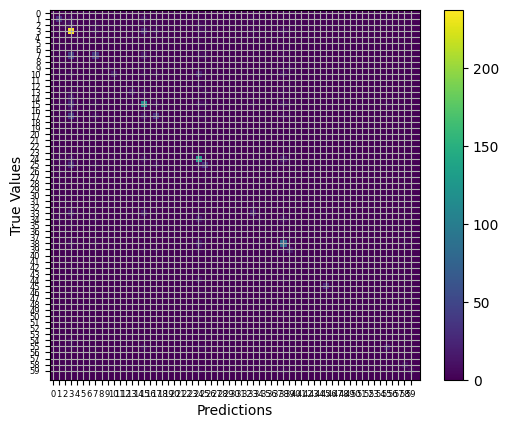

In [83]:
# Visualize the CM
ticks=np.linspace(0, 59,num=60)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.imshow(cm, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()

In [92]:
print('Fitting the classifier to the training set')
t0 = time.time()
param_grid = {
    'C': loguniform(1e3, 1e5),
    'gamma': loguniform(1e-4, 1e-1),
}
SVC_random = RandomizedSearchCV(
    SVC(kernel='rbf',
        #class_weight='balanced'
        ),
        param_grid, n_iter=10, cv = 5)
clf = clf.fit(X_train_fp_2p_trans, y_train_fp_2p)
print('done in %0.3fs' % (time.time() - t0))
print('Best estimator found by grid search:')
print(clf.best_estimator_)

Fitting the classifier to the training set


/home/ostap/projects/mike_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


done in 367.635s
Best estimator found by grid search:
SVC(C=4815.839154019686, gamma=0.00047588699372380985)


In [98]:
# Create the SVM
svm = SVC(kernel='rbf', gamma=0.00047588699372380985, C=4815.839154019686, random_state= 890)

In [99]:
# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

In [100]:
# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(X_train_fp_2p_trans, y_train_fp_2p)

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [ ]:
# Get predictions for test data
predictions_fp_2p_svm = multilabel_classifier.predict(X_test_fp_2p_trans)

In [ ]:
multilabel_classifier.score(X_test_fp_2p_trans, y_test_fp_2p)

# NEXT IS HERE

In [ ]:
#ovr svm Gaussian Radial Basis Function (RBF)

In [ ]:
#ovo svm Gaussian Radial Basis Function (RBF)

In [53]:
# WANNA DO LIST:


## All classifiers in scikit-learn do multiclass classification out-of-the-box. You don’t need to use the sklearn.multiclass module unless you want to experiment with different multiclass strategies.


## OnevsRestClassifier https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier
## Check what estimators i wanna use it with



## Multilabel classification using a classifier chain https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain
## https://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html#sphx-glr-auto-examples-multioutput-plot-classifier-chain-yeast-py


## 1. Try XGBoost and xblt algorithms


## 2. I wanna play with weights and up/down scaling  ------------ ROC curve using the OvR macro-average is for equally weighted
#  after up down sampling tune hyperparameters and test the models again


## 3. Build the mf NN










#### Saving Best Model

In [ ]:
# saving the model
# joblib.dump(classifier_fp_2p_p2, './saved_files/classifier_fp_2p_p2.joblib')

In [ ]:
# The Inverse Class Frequency Method
weight_0 = total_samples / (2 * class_0_samples)
weight_1 = total_samples / (2 * class_1_samples)

"""
total_samples is the total number of samples in the dataset.
class_0_samples is the number of samples in the majority class (class 0).
class_1_samples is the number of samples in the minority class (class 1).
2 is the number of classes here.
"""
import numpy as np

def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(y)
print("Class weights:", class_weights)


#Using Class Weights in Scikit-learn
# Assuming you have calculated class_weights
logreg = LogisticRegression(class_weight=class_weights)

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]
])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])
array([2, 0, 1])